# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
HTTP_STATUS_OK = 200
HTTP_STATUS_NOT_FOUND = 404

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# url = # YOUR CODE HERE
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = # YOUR CODE HERE
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    # Parse the JSON and retrieve data
    # city_weather = # YOUR CODE HERE
    city_response = requests.get(city_url)
    status = city_response.status_code

    if status == HTTP_STATUS_NOT_FOUND:
        print("City not found. Skipping...")
    elif status == HTTP_STATUS_OK:
#          try:
        city_weather = city_response.json()    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#         # If an error is experienced, skip the city
#         except KeyError:
#             print("City not found with HTTP status 200. Skipping...")
#             pass
    else:
        raise ValueError(f"unknown HTTP status {status}")
            
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | negapatam
Processing Record 2 of Set 1 | xilin hot
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | lagos
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | tyuratam
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | knyaze-volkonskoye
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | carutapera
Processing Record 11 of Set 1 | sorong
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | conde
Processing Record 17 of Set 1 | heihe
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | midvagur
Processing Record 22 of Set 1 | port mathurin
Processing Record 23 o

Processing Record 40 of Set 4 | nueva guinea
Processing Record 41 of Set 4 | takoradi
Processing Record 42 of Set 4 | hermanus
Processing Record 43 of Set 4 | el calafate
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | chiredzi
Processing Record 47 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 48 of Set 4 | kittila
Processing Record 49 of Set 4 | arti
Processing Record 0 of Set 5 | semikarakorsk
Processing Record 1 of Set 5 | andapa
Processing Record 2 of Set 5 | las lomitas
Processing Record 3 of Set 5 | whitehorse
Processing Record 4 of Set 5 | ismailia
Processing Record 5 of Set 5 | newman
Processing Record 6 of Set 5 | luwuk
Processing Record 7 of Set 5 | lorengau
Processing Record 8 of Set 5 | broken hill
Processing Record 9 of Set 5 | piattoni-villa sant'antonio
Processing Record 10 of Set 5 | kirakira
Processing Record 11 of Set 5 | kiunga
Processing Record 12 of Set 5 | vallenar
Proces

Processing Record 31 of Set 8 | zheleznogorsk
Processing Record 32 of Set 8 | guadalupe y calvo
Processing Record 33 of Set 8 | kapuskasing
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | porangatu
Processing Record 36 of Set 8 | moyynkum
Processing Record 37 of Set 8 | aldinga beach
Processing Record 38 of Set 8 | tenno
Processing Record 39 of Set 8 | kultali
City not found. Skipping...
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | kiffa
Processing Record 42 of Set 8 | savastepe
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | nogliki
Processing Record 45 of Set 8 | quang ngai
Processing Record 46 of Set 8 | acireale
Processing Record 47 of Set 8 | vilyuchinsk
Processing Record 48 of Set 8 | tamanrasset
Processing Record 49 of Set 8 | griffith
Processing Record 0 of Set 9 | shangri-la
City not found. Skipping...
Processing Record 1 of Set 9 | christchurch
Processing Record 2 of Set 9 | ust'-barguzin
Processing Record 

Processing Record 19 of Set 12 | kongsberg
Processing Record 20 of Set 12 | pingyin
Processing Record 21 of Set 12 | arkhangel'sk
Processing Record 22 of Set 12 | acarau
Processing Record 23 of Set 12 | dunedin
Processing Record 24 of Set 12 | proletariy
Processing Record 25 of Set 12 | lai chau
Processing Record 26 of Set 12 | orsa
Processing Record 27 of Set 12 | kinwat
Processing Record 28 of Set 12 | gorontalo
Processing Record 29 of Set 12 | barra de santo antonio
Processing Record 30 of Set 12 | larkird
Processing Record 31 of Set 12 | weno
Processing Record 32 of Set 12 | khanty-mansiysk
Processing Record 33 of Set 12 | mabaruma
Processing Record 34 of Set 12 | concordia
Processing Record 35 of Set 12 | luganville
Processing Record 36 of Set 12 | cristalina
Processing Record 37 of Set 12 | gilgit
Processing Record 38 of Set 12 | akobo
Processing Record 39 of Set 12 | abra pampa
Processing Record 40 of Set 12 | roslavl'
Processing Record 41 of Set 12 | fallon
Processing Record 42

In [5]:
# Convert the cities weather data into a Pandas DataFrame
# city_data_df = # YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,negapatam,10.7667,79.8333,28.22,80,100,4.15,IN,1689460269
1,xilin hot,43.9667,116.0333,16.22,57,0,1.60,CN,1689459839
2,port alfred,-33.5906,26.8910,16.58,76,89,3.20,ZA,1689460045
3,lagos,6.5833,3.7500,25.13,89,88,2.04,NG,1689460270
4,aasiaat,68.7098,-52.8699,3.16,96,100,4.55,GL,1689460082


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,negapatam,10.7667,79.8333,28.22,80,100,4.15,IN,1689460269
1,xilin hot,43.9667,116.0333,16.22,57,0,1.60,CN,1689459839
2,port alfred,-33.5906,26.8910,16.58,76,89,3.20,ZA,1689460045
3,lagos,6.5833,3.7500,25.13,89,88,2.04,NG,1689460270
4,aasiaat,68.7098,-52.8699,3.16,96,100,4.55,GL,1689460082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

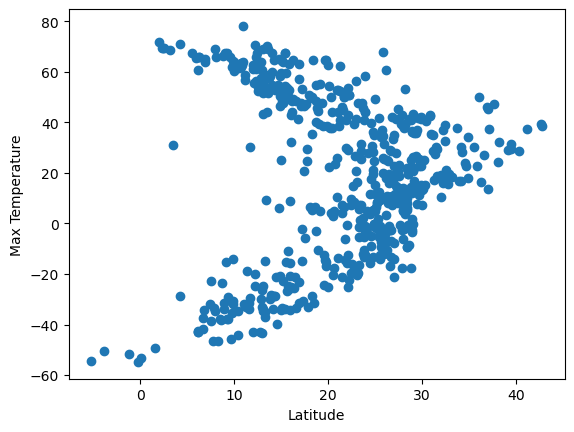

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

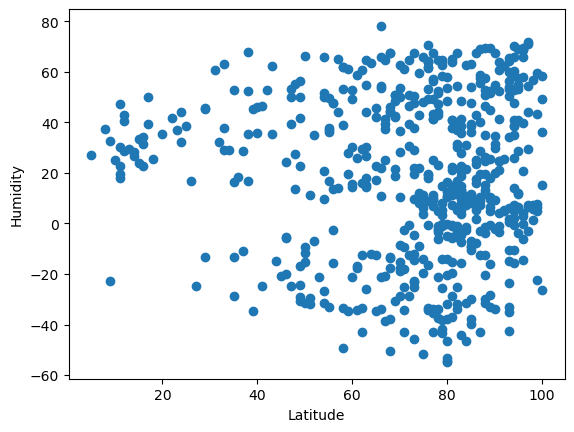

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

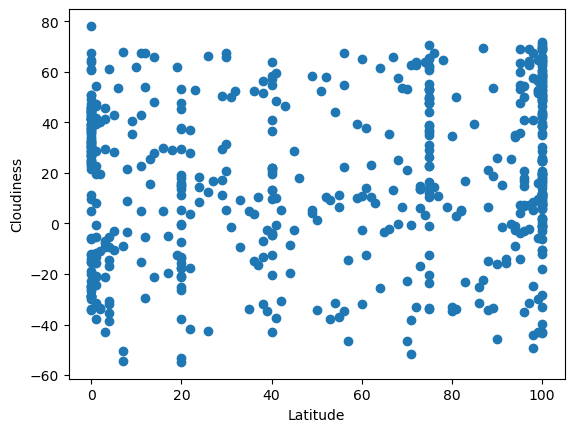

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

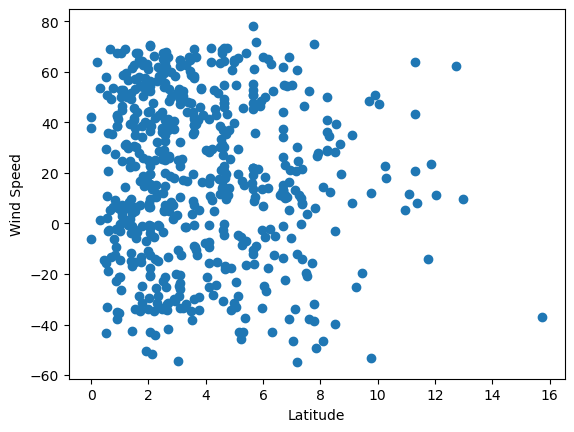

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x, y, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r-value is: {rvalue}")
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,negapatam,10.7667,79.8333,28.22,80,100,4.15,IN,1689460269
1,xilin hot,43.9667,116.0333,16.22,57,0,1.60,CN,1689459839
3,lagos,6.5833,3.7500,25.13,89,88,2.04,NG,1689460270
4,aasiaat,68.7098,-52.8699,3.16,96,100,4.55,GL,1689460082
5,tyuratam,45.6507,63.3156,23.71,29,0,1.49,KZ,1689460270


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,16.58,76,89,3.20,ZA,1689460045
6,grytviken,-54.2811,-36.5092,-5.21,80,7,3.04,GS,1689460046
9,carutapera,-1.1950,-46.0200,25.06,88,91,3.26,BR,1689459915
10,sorong,-0.8833,131.2500,23.98,91,100,2.08,ID,1689460078
12,port-aux-francais,-49.3500,70.2167,1.62,58,98,7.83,TF,1689460045


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.631035853648657


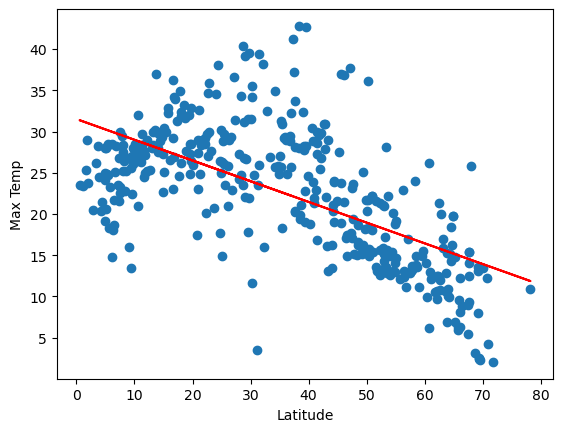

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))


The r-value is: 0.861893469189451


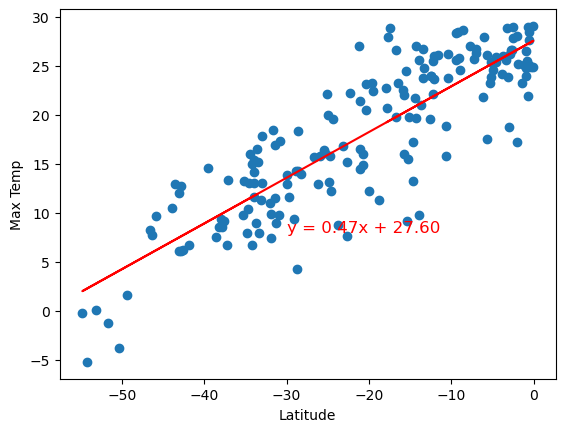

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE - Temperature vs. Latitude Linear Regression Plot for Northern Hemisphere with a correlation coefficient (R-value) of -0.6190022004014772 indicates high negative correlation.
For the Southern Hemisphere, the correlation coefficient (R-value) of 0.7507954535677317 indicates a high positive correlation between temperature and latitude.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.04741962135278729


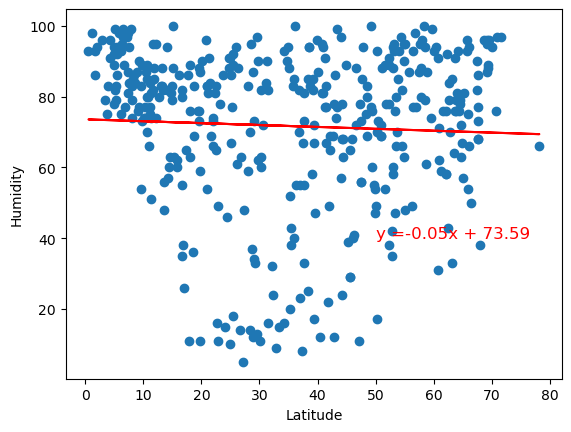

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.10992692987348045


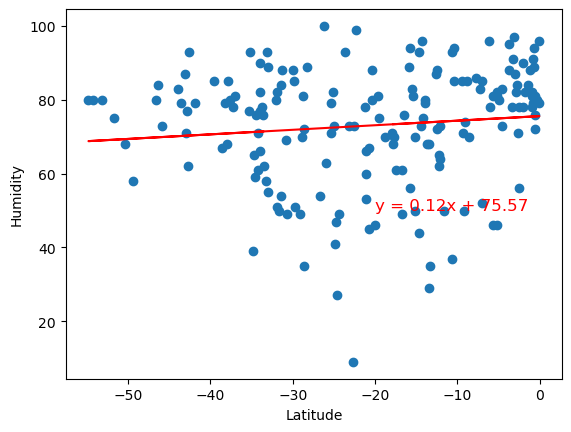

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE - Humidity vs. Latitude Linear Regression Plot for Northern Hemisphere with a correlation coefficient (R-value) of -0.09081516128263975 indicates a low negative correlation.
For the Southern Hemisphere, the correlation coefficient (R-value) of -0.0003764148279377453 indicates a lower negative correlation between Humidity and latitude compared to the Northern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02080285072702595


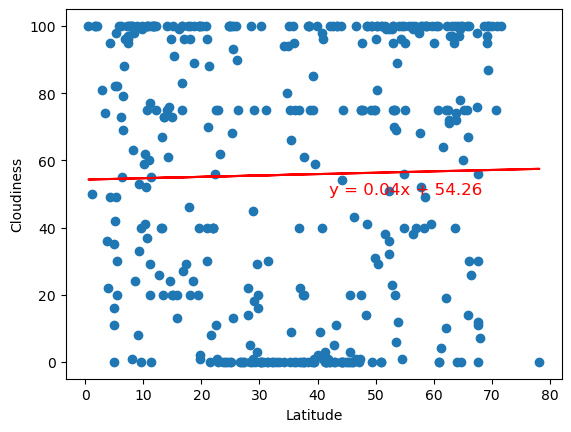

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.030067999968353243


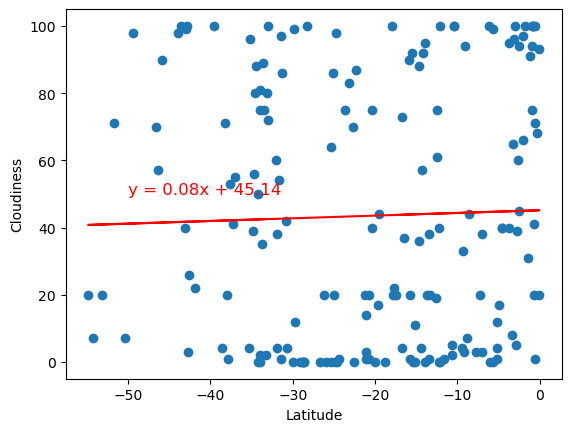

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE - Cloudiness vs. Latitude Linear Regression Plot for Northern Hemisphere with a correlation coefficient (R-value) of -0.024108067297441516 indicates a negative correlation between cloudiness and latitude.
For the Southern Hemisphere, the correlation coefficient (R-value) of 1.998191709086915e-05 indicates a higher positive correlation between cloudiness and latitude ompared to the Northern Hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11252245239753793


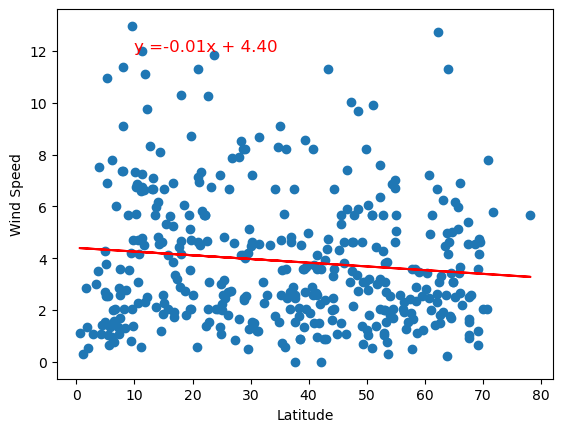

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.16249313422744763


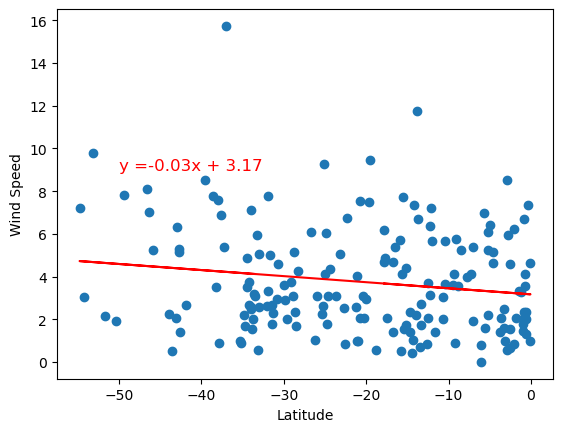

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE - Wind Speed vs. Latitude Linear Regression Plot for Northern Hemisphere with a correlation coefficient (R-value) of -0.10278036824346759 indicates a negative correlation between Wind Speed and latitude.
For the Southern Hemisphere, the correlation coefficient (R-value) of -0.22004406974230203 also indicates a negative correlation between Wind Speed and latitude but slightly higher compared to the Northern Hemisphere.